In [5]:
from IPython.display import Image
import numpy as np
import scipy.fftpack as fourier#para calcular la transformada de fourier 
import matplotlib.pyplot as plt# para hacer los plot de la grafica 
import scipy.io.wavfile as waves
import winsound

In [6]:
gn = [0, 1, 2, 3, 4] # Definimos una función en tiempo discreto
gk = fourier.fft(gn) # Calculamos la FFT
gk

array([10. +0.j        , -2.5+3.4409548j , -2.5+0.81229924j,
       -2.5-0.81229924j, -2.5-3.4409548j ])

In [7]:
M_gk = abs(gk)                   # Calculamos la Magnitud de la FFT que es la gk mediante el comando abs 
Ph_gk = np.angle(gk)             # Calculamos la Fase de la FFT
print('Magnitud: ', M_gk)
print('Angle: ',Ph_gk*180/np.pi)# tambien podemos encontrar los numero complejos podemos encontrar un vector de fase

Magnitud:  [10.          4.25325404  2.62865556  2.62865556  4.25325404]
Angle:  [   0.  126.  162. -162. -126.]


<IPython.core.display.Javascript object>


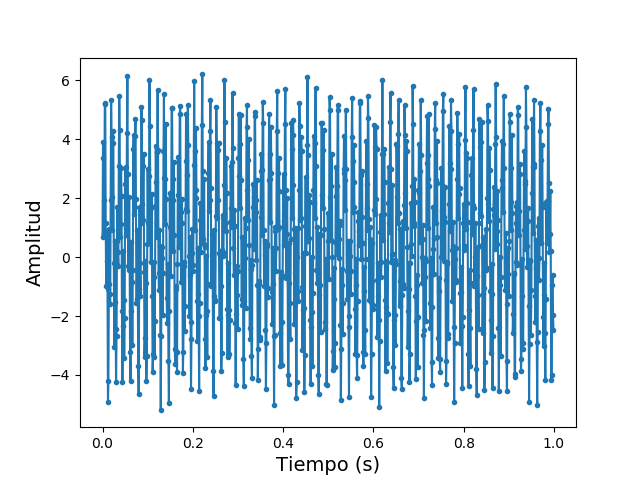

In [10]:
%matplotlib notebook

Ts = 0.001                                       # Definimos un tiempo y frecuencia de muestreo
Fs=1/Ts
w1 = 2*np.pi*60                                  # Definimos una frecuencia de 60 Hz para la señal 1
w2 = 2*np.pi*223                                 # Definimos una frecuencia de 223 Hz para la señal 2

n = Ts*np.arange(0, 1000)                         # creamos un vector de tiempo de mil datos 
ruido = np.random.random(len(n))                #creamos un ruido con la funcion de ramdom 
x = 3*np.sin(w1*n)+2.3*np.sin(w2*n)+ruido        # Construimos una señal compuesta por la señal 1 y 2, y agregamos ruido


plt.plot(n,x,'.-')
plt.xlabel('Tiempo (s)', fontsize='14')
plt.ylabel('Amplitud', fontsize='14')
plt.show()

<IPython.core.display.Javascript object>


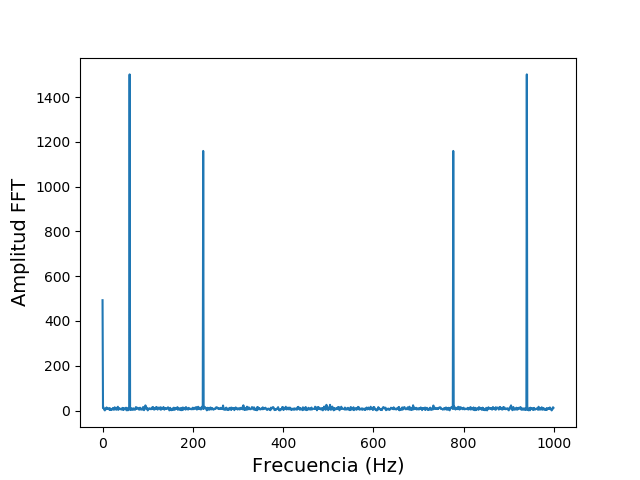

In [11]:
%matplotlib notebook

gk = fourier.fft(x)                             # Calculamos la FFT
M_gk = abs(gk)                                  # Calculamos la Magnitud de la FFT

F = Fs*np.arange(0, len(x))/len(x)              # Definimos el Vector de Frecuencias

plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()

<IPython.core.display.Javascript object>


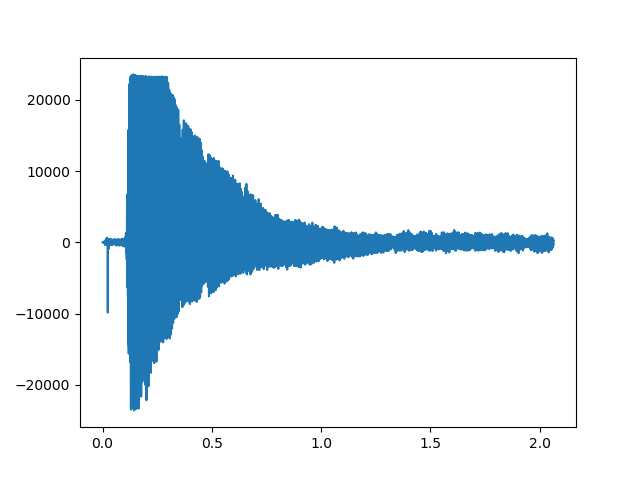

In [12]:
%matplotlib notebook

filename='7.data/rec_SOL.wav'                         #cargamos el sonido desde la carpeta        
winsound.PlaySound(filename, winsound.SND_FILENAME)   # Reproducimos el sonido que vamos a cargar

Fs, data = waves.read(filename)                       # Leemos el archivo de audio del directorio
Audio_m = data[:,0]              

L = len(Audio_m)                                      # Tomamos la longitud de la señal

n = np.arange(0,L)/Fs                                 # Definimos un vector de tiempo de la misma longitud de la señal

plt.plot(n,Audio_m)                                 #funcion de plotear 
plt.show()

<IPython.core.display.Javascript object>


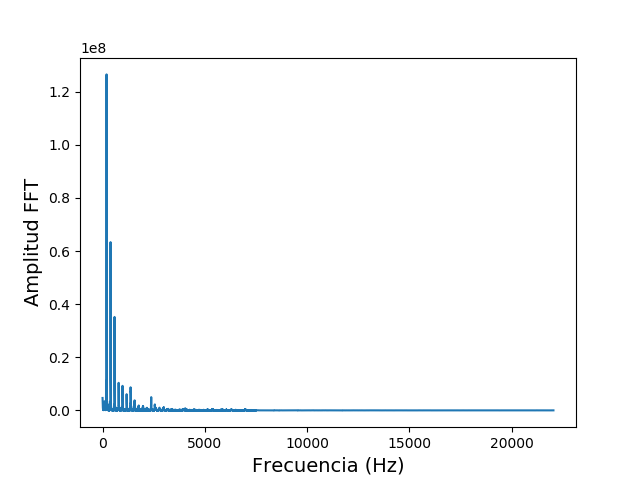

In [13]:
%matplotlib notebook

gk = fourier.fft(Audio_m)                        # Calculamos la FFt de la señal de audio
M_gk = abs(gk)                                   # Tomamos la Magnitud de la FFT
M_gk = M_gk[0:L//2]                              # Tomamos la mitad de los datos (recordar la simetría de la transformada)

Ph_gk = np.angle(gk)
F = Fs*np.arange(0, L//2)/L                      #calculamos el vector de frecuencia 

plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()

In [14]:
Posm = np.where(M_gk == np.max(M_gk))           # Encontramos la posición para la cual la Magnitud de FFT es máxima
F_fund = F[Posm]                                # Identificamos la Frecuencia asociada al valor del máximo de la Magnitud de FFT

if F_fund > 135 and F_fund < 155:                   # Rango de frecuencias para nota RE
    print("La nota es RE, con frecuencia: ",F_fund)
elif F_fund > 190 and F_fund < 210:                   # Rango de frecuencias para nota SOL
    print("La nota es SOL, con frecuencia: ",F_fund)
elif F_fund > 235 and F_fund < 255:                     # Rango de frecuencias para nota SI
    print("La nota es SI, con frecuencia: ",F_fund)
elif F_fund > 320 and F_fund < 340:                   # Rango de frecuencias para nota MI
    print("La nota es MI, con frecuencia: ",F_fund)

La nota es SOL, con frecuencia:  [195.76740506]


In [17]:
!pip install PyAudio

In [15]:
import matplotlib
import pyaudio as pa 
import struct 

matplotlib.use('TkAgg')
#%matplotlib notebook

FRAMES = 1024*8                                   # Tamaño del paquete a procesar
FORMAT = pa.paInt16                               # Formato de lectura INT 16 bits
CHANNELS = 1
Fs = 44100                                        # Frecuencia de muestreo típica para audio

p = pa.PyAudio()

stream = p.open(                                  # Abrimos el canal de audio con los parámeteros de configuración
    format = FORMAT,
    channels = CHANNELS,
    rate = Fs,
    input=True,
    output=True,
    frames_per_buffer=FRAMES
)

## Creamos una gráfica con 2 subplots y configuramos los ejes

fig, (ax,ax1) = plt.subplots(2)

x_audio = np.arange(0,FRAMES,1)
x_fft = np.linspace(0, Fs, FRAMES)

line, = ax.plot(x_audio, np.random.rand(FRAMES),'r')
line_fft, = ax1.semilogx(x_fft, np.random.rand(FRAMES), 'b')

ax.set_ylim(-32500,32500)
ax.ser_xlim = (0,FRAMES)

Fmin = 1
Fmax = 5000
ax1.set_xlim(Fmin,Fmax)

fig.show()


F = (Fs/FRAMES)*np.arange(0,FRAMES//2)                 # Creamos el vector de frecuencia para encontrar la frecuencia dominante

while True:
    
    data = stream.read(FRAMES)                         # Leemos paquetes de longitud FRAMES
    dataInt = struct.unpack(str(FRAMES) + 'h', data)   # Convertimos los datos que se encuentran empaquetados en bytes
    
    line.set_ydata(dataInt)                            # Asignamos los datos a la curva de la variación temporal
    
    M_gk = abs(fourier.fft(dataInt)/FRAMES)            # Calculamos la FFT y la Magnitud de la FFT del paqute de datos

    
    ax1.set_ylim(0,np.max(M_gk+10)) 
    line_fft.set_ydata(M_gk)                           # Asigmanos la Magnitud de la FFT a la curva del espectro 
    
    M_gk = M_gk[0:FRAMES//2]                           # Tomamos la mitad del espectro para encontrar la Frecuencia Dominante
    Posm = np.where(M_gk == np.max(M_gk))
    F_fund = F[Posm]                                   # Encontramos la frecuencia que corresponde con el máximo de M_gk
    
    print(int(F_fund))                                 # Imprimimos el valor de la frecuencia dominante

    fig.canvas.draw()
    fig.canvas.flush_events()

64
290
53
64
5668
3364
86
75
80
64
199
506
3364
53
5512
80
75
69
3472
209
193
5167
4715
7515
6890
3628
3396
3359
4080
4085
4085
4080
4128
4085
4107
4091
4085
4080
4085
3601
80
4085
4053
4091
64
4080
4128
4080
4075
139
4085
253
247
220
193
215
215
188
183
177
183
4091
4080
134
123
134
129
118
118
4085
215
360
231
215
215
199
204
204
204
204
193
199
209
204
193
183
236
91
129
123
118
113
107
5356
80
5372
80
484
231
107
107
107
161
139
7213
7305
3423
139
3364
3590
3590
3542
6702
3542
80
64
80
3520
3585
3585
43
220
7219
43
7375
522
43
7380
69
80
4064
4085
3714
4085
4080
139
4085
4080
4091
80
80
269
209
215
193
236
75
64
4112
102
139
4080
80
43
172
139
134
43
296
4059
64
113
102
113
107
5700
107
5754
48
118
107
113
199
193
199
4791
220
4059
4080
4064
48
75
69
3364
3364
166
3499
75
920
215
220
123
516
183
7332
43
7439
6029
3547
172
64
7337
75
43
204
145
134
43
53
7439
3472
3472
69
69
69
177
59
69
91
3547
91
64
3585
3687
3682
3682
80
91
129
91
91
3542
538
3676
64
3779
629
613
5528
64
4085
409

TclError: invalid command name "pyimage10"